<a href="https://colab.research.google.com/github/Howida100/deep-learning-/blob/master/data_pre_processingdynamic_data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://www.datacamp.com/community/tutorials/categorical-data#exploration
import pandas as pd
import numpy as np
import copy

In [0]:
#https://community.modeanalytics.com/python/tutorial/counting-and-plotting-in-python/
#Load Libraries
#https://www.kaggle.com/mryapss/remove-or-modify-empty-values-in-a-csv-dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [0]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving complete combined.csv to complete combined (3).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "complete combined.csv" with length 11408868 bytes


In [0]:
# open csv
import pandas as pd
import numpy as np
df = pd.read_csv('complete combined.csv')
df

,Package,Category,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),lablel
0,net.iconchanger,Personalization,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
1,com.Jaaru.TruthorDareFree,Comics,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
2,com.jrtstudio.iSyncr,Music & Audio,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
3,com.ftbsports.fmrm,Sports Games,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
4,com.sillycube.android.Rushing,Sports Games,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
5,com.mathpad.mobile.android.wt.unit,Tools,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
6,com.tvshowfavs,Entertainment,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
7,com.AndPhone.game.DonutKungFu,Racing,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
8,com.highlycaffeinatedcode.scrabblehelper,Brain & Puzzle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware
9,com.doenter.android.vpn.fivevpn,Tools,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,malware


In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28849 entries, 0 to 28848
Columns: 176 entries, Package to lablel
dtypes: int64(173), object(3)
memory usage: 38.7+ MB
None


In [0]:
#filter categorical features

cat_df = df.select_dtypes(include=['object']).copy() # separate DataFrame consisting of only these features 

In [0]:
cat_df

,Package,Category,lablel
0,net.iconchanger,Personalization,malware
1,com.Jaaru.TruthorDareFree,Comics,malware
2,com.jrtstudio.iSyncr,Music & Audio,malware
3,com.ftbsports.fmrm,Sports Games,malware
4,com.sillycube.android.Rushing,Sports Games,malware
5,com.mathpad.mobile.android.wt.unit,Tools,malware
6,com.tvshowfavs,Entertainment,malware
7,com.AndPhone.game.DonutKungFu,Racing,malware
8,com.highlycaffeinatedcode.scrabblehelper,Brain & Puzzle,malware
9,com.doenter.android.vpn.fivevpn,Tools,malware


In [0]:
cat_df.head()

,Package,Category,lablel
0,net.iconchanger,Personalization,malware
1,com.Jaaru.TruthorDareFree,Comics,malware
2,com.jrtstudio.iSyncr,Music & Audio,malware
3,com.ftbsports.fmrm,Sports Games,malware
4,com.sillycube.android.Rushing,Sports Games,malware


In [0]:
print(cat_df.isnull().values.sum())#check for null values

0


In [0]:
print(cat_df['lablel'].value_counts())

nonmalware    18850
malware        9999
Name: lablel, dtype: int64


In [0]:
print(cat_df['lablel'].value_counts().count())#frequency distribution of label ,count of distinct categories

2


In [0]:
print(cat_df['Category'].value_counts())# frequency distribution of Category

Personalization      2106
Tools                1911
Arcade & Action      1507
Entertainment        1494
Productivity         1295
Casual               1223
Brain & Puzzle       1183
Travel & Local       1061
Communication        1020
Lifestyle             986
Books & Reference     962
Music & Audio         907
Education             880
Sports                848
Social                841
Media & Video         797
Health & Fitness      796
Finance               791
Business              783
Cards & Casino        781
News & Magazines      767
Shopping              741
Sports Games          736
Photography           717
Racing                711
Weather               675
Transportation        624
Comics                607
Medical               553
Libraries & Demo      546
Name: Category, dtype: int64


In [0]:
print(cat_df['Package'].value_counts())# frequency distribution of package

com.shazam.android                      14
com.shazam.encore.android               13
com.adobe.reader                        11
com.zoodles.kidmode                     11
com.google.android.apps.plus            11
com.facebook.katana                     11
com.skype.raider                        10
com.estrongs.android.taskmanager        10
com.qo.android.am3                      10
org.mozilla.firefox                     10
com.dataviz.docstogoapp                 10
com.google.android.apps.maps            10
com.jrtstudio.iSyncr                     9
com.google.android.voicesearch           9
mobi.infolife.eraser                     9
com.levelup.beautifulwidgets             9
com.mw.slotsroyale                       9
com.speedsoftware.rootexplorer           9
com.google.android.apps.translate        9
tw.com.quickmark                         9
it.medieval.blueftp                      8
com.alensw.PicFolder                     8
com.google.android.apps.reader           8
com.google.

In [0]:
print(cat_df['Package'].value_counts().head(100))

com.shazam.android                                                 14
com.shazam.encore.android                                          13
com.adobe.reader                                                   11
com.zoodles.kidmode                                                11
com.google.android.apps.plus                                       11
com.facebook.katana                                                11
com.skype.raider                                                   10
com.estrongs.android.taskmanager                                   10
com.qo.android.am3                                                 10
org.mozilla.firefox                                                10
com.dataviz.docstogoapp                                            10
com.google.android.apps.maps                                       10
com.jrtstudio.iSyncr                                                9
com.google.android.voicesearch                                      9
mobi.infolife.eraser

In [0]:
cat_df.head()

,Package,Category,lablel
0,net.iconchanger,Personalization,malware
1,com.Jaaru.TruthorDareFree,Comics,malware
2,com.jrtstudio.iSyncr,Music & Audio,malware
3,com.ftbsports.fmrm,Sports Games,malware
4,com.sillycube.android.Rushing,Sports Games,malware


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


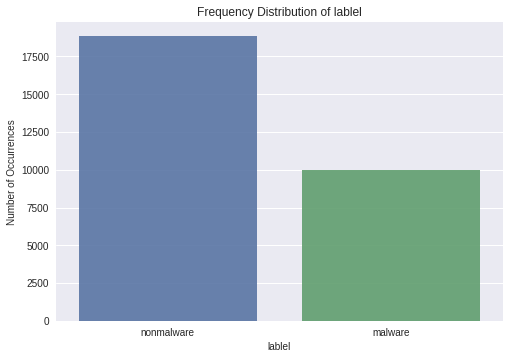

In [0]:
#plot a barplot of the frequency distribution of
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
lablel_count = cat_df['lablel'].value_counts()
sns.set(style="darkgrid")
sns.barplot(lablel_count.index, lablel_count.values, alpha=0.9)
plt.title('Frequency Distribution of lablel')
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('lablel', fontsize=10)
plt.show()

In [0]:
cat_df = df.select_dtypes(include=['object']).copy()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


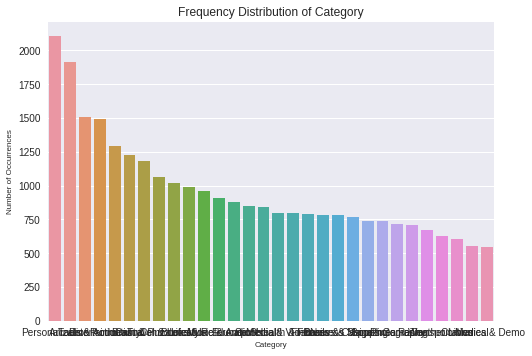

In [0]:
#plot a barplot of the frequency distribution of Category
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
Category_count = cat_df['Category'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Category_count.index, Category_count.values, alpha=1)
plt.title('Frequency Distribution of Category')
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('Category', fontsize=8)
plt.show()

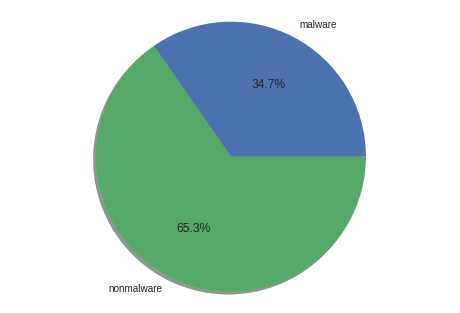

In [0]:
labels = cat_df['lablel'].astype('category').cat.categories.tolist()
counts = cat_df['lablel'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

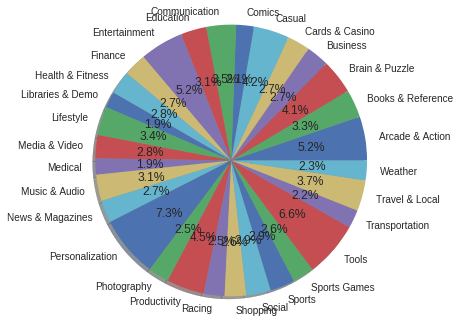

In [0]:
labels = cat_df['Category'].astype('category').cat.categories.tolist()
counts = cat_df['Category'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [0]:
cat_df

,Package,Category,lablel
0,net.iconchanger,Personalization,malware
1,com.Jaaru.TruthorDareFree,Comics,malware
2,com.jrtstudio.iSyncr,Music & Audio,malware
3,com.ftbsports.fmrm,Sports Games,malware
4,com.sillycube.android.Rushing,Sports Games,malware
5,com.mathpad.mobile.android.wt.unit,Tools,malware
6,com.tvshowfavs,Entertainment,malware
7,com.AndPhone.game.DonutKungFu,Racing,malware
8,com.highlycaffeinatedcode.scrabblehelper,Brain & Puzzle,malware
9,com.doenter.android.vpn.fivevpn,Tools,malware


In [0]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 2.9MB/s 


In [0]:
cat_df_ce = cat_df.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Category'])
df_binary = encoder.fit_transform(cat_df_ce)

df_binary


,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Package,lablel
0,0,0,0,0,0,1,net.iconchanger,malware
1,0,0,0,0,1,0,com.Jaaru.TruthorDareFree,malware
2,0,0,0,0,1,1,com.jrtstudio.iSyncr,malware
3,0,0,0,1,0,0,com.ftbsports.fmrm,malware
4,0,0,0,1,0,0,com.sillycube.android.Rushing,malware
5,0,0,0,1,0,1,com.mathpad.mobile.android.wt.unit,malware
6,0,0,0,1,1,0,com.tvshowfavs,malware
7,0,0,0,1,1,1,com.AndPhone.game.DonutKungFu,malware
8,0,0,1,0,0,0,com.highlycaffeinatedcode.scrabblehelper,malware
9,0,0,0,1,0,1,com.doenter.android.vpn.fivevpn,malware


In [0]:
cat_df_ce = cat_df.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['lablel'])
df_binary = encoder.fit_transform(cat_df_ce)

df_binary

,lablel_0,lablel_1,Package,Category
0,0,1,net.iconchanger,Personalization
1,0,1,com.Jaaru.TruthorDareFree,Comics
2,0,1,com.jrtstudio.iSyncr,Music & Audio
3,0,1,com.ftbsports.fmrm,Sports Games
4,0,1,com.sillycube.android.Rushing,Sports Games
5,0,1,com.mathpad.mobile.android.wt.unit,Tools
6,0,1,com.tvshowfavs,Entertainment
7,0,1,com.AndPhone.game.DonutKungFu,Racing
8,0,1,com.highlycaffeinatedcode.scrabblehelper,Brain & Puzzle
9,0,1,com.doenter.android.vpn.fivevpn,Tools


In [0]:
cat_df_lc = cat_df.copy()
cat_df_lc['Package'] = cat_df_lc['Package'].astype('category')
cat_df_lc['lablel'] = cat_df_lc['lablel'].astype('category')                                                              

print(cat_df_lc.dtypes)

Package     category
Category      object
lablel      category
dtype: object


In [0]:
cat_df_lc['lablel'] = cat_df_lc['lablel'].cat.codes


In [0]:
cat_df_lc.head(1000) #alphabetically labeled from 0 to 10


,Package,Category,lablel
0,net.iconchanger,Personalization,0
1,com.Jaaru.TruthorDareFree,Comics,0
2,com.jrtstudio.iSyncr,Music & Audio,0
3,com.ftbsports.fmrm,Sports Games,0
4,com.sillycube.android.Rushing,Sports Games,0
5,com.mathpad.mobile.android.wt.unit,Tools,0
6,com.tvshowfavs,Entertainment,0
7,com.AndPhone.game.DonutKungFu,Racing,0
8,com.highlycaffeinatedcode.scrabblehelper,Brain & Puzzle,0
9,com.doenter.android.vpn.fivevpn,Tools,0


In [0]:
cat_df_lc['Package'] = cat_df_lc['Package'].cat.codes

In [0]:
#label encoding"
cat_df_lc #alphabetically labeled from 0 to 10


,Package,Category,lablel
0,19088,Personalization,0
1,1345,Comics,0
2,9036,Music & Audio,0
3,6819,Sports Games,0
4,13790,Sports Games,0
5,10286,Tools,0
6,15347,Entertainment,0
7,1140,Racing,0
8,7931,Brain & Puzzle,0
9,5522,Tools,0


In [0]:
cat_df_lc = cat_df.copy()
cat_df_lc['Category'] = cat_df_lc['Category'].astype('category')

In [0]:
cat_df_lc['Category'] = cat_df_lc['Category'].cat.codes

In [0]:
cat_df_lc #alphabetically labeled from 0 to 10

,Package,Category,lablel
0,net.iconchanger,18,malware
1,com.Jaaru.TruthorDareFree,6,malware
2,com.jrtstudio.iSyncr,16,malware
3,com.ftbsports.fmrm,25,malware
4,com.sillycube.android.Rushing,25,malware
5,com.mathpad.mobile.android.wt.unit,26,malware
6,com.tvshowfavs,9,malware
7,com.AndPhone.game.DonutKungFu,21,malware
8,com.highlycaffeinatedcode.scrabblehelper,2,malware
9,com.doenter.android.vpn.fivevpn,26,malware


In [0]:
cat_df_lc = cat_df.copy()
cat_df_lc['Package'] = cat_df_lc['Package'].astype('category')
cat_df_lc['Package'] = cat_df_lc['Package'].cat.codes
cat_df_lc['Category'] = cat_df_lc['Category'].astype('category')
cat_df_lc['Category'] = cat_df_lc['Category'].cat.codes
cat_df_lc['lablel'] = cat_df_lc['lablel'].astype('category')
cat_df_lc['lablel'] = cat_df_lc['lablel'].cat.codes

In [0]:
cat_df_lc

,Package,Category,lablel
0,19088,18,0
1,1345,6,0
2,9036,16,0
3,6819,25,0
4,13790,25,0
5,10286,26,0
6,15347,9,0
7,1140,21,0
8,7931,2,0
9,5522,26,0


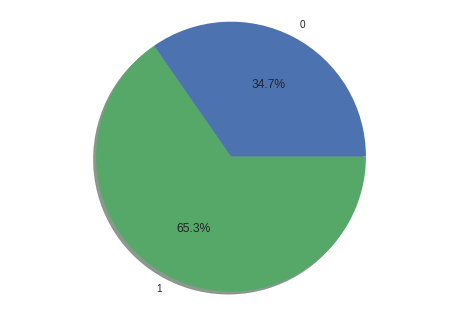

In [0]:
labels = cat_df_lc['lablel'].astype('category').cat.categories.tolist()
counts = cat_df_lc['lablel'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [0]:
cat_df_lc

,Package,Category,lablel
0,19088,18,0
1,1345,6,0
2,9036,16,0
3,6819,25,0
4,13790,25,0
5,10286,26,0
6,15347,9,0
7,1140,21,0
8,7931,2,0
9,5522,26,0


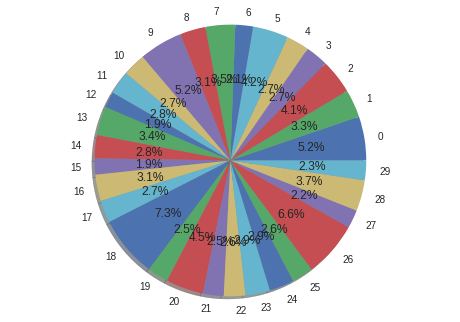

In [0]:
labels = cat_df_lc['Category'].astype('category').cat.categories.tolist()
counts = cat_df_lc['Category'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()